In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn import preprocessing

**1. Препроцессинг**

1. Прочитайте файл из: `datasets/checker_regression.csv`.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
df = pd.read_csv('/content/drive/MyDrive/Школа 21/DS_project 13 Введение в машинное обучение/Task 5: Регрессия/checker_regression.csv')

2. Заполните пропущенные значения нулями.

In [20]:
df.fillna(0, inplace=True)
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,0.00
1,user_1,62,28.0,0.00
2,user_1,62,28.0,0.00
3,user_1,62,28.0,0.00
4,user_1,62,28.0,0.00
...,...,...,...,...
72,user_31,128,0.0,-104.75
73,user_4,40,0.0,-175.60
74,user_6,15,0.0,-62.60
75,user_7,8,0.0,-115.50


In [23]:
# Закодируем часть категориальных признаков с помощью LabelEncoder()
# 1. Создадим модель кодировщика
label_encoder = preprocessing.LabelEncoder() 

# 2. Обучение кодировщика: по сути тут создает словарь уникальных слов из переданного массива, 
# соотносит для каждого слова число
label_encoder.fit(df['uid']) 

# на этом этапе по сути применяет полученный словарь в переданным данных (в данном случае мы передали столбец число)
df['uid'] = label_encoder.transform(df['uid']) 

In [24]:
df

,uid,num_commits,pageviews,AVG(diff)
0,0,62,28.0,0.00
1,0,62,28.0,0.00
2,0,62,28.0,0.00
3,0,62,28.0,0.00
4,0,62,28.0,0.00
...,...,...,...,...
72,24,128,0.0,-104.75
73,25,40,0.0,-175.60
74,26,15,0.0,-62.60
75,27,8,0.0,-115.50


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          77 non-null     int64  
 1   num_commits  77 non-null     int64  
 2   pageviews    77 non-null     float64
 3   AVG(diff)    77 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.5 KB


In [ ]:
#еще можно было закодировать через get_dummies
#df = pd.get_dummies(df)
#df

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_commits  77 non-null     int64  
 1   pageviews    77 non-null     float64
 2   AVG(diff)    77 non-null     float64
 3   uid_user_1   77 non-null     uint8  
 4   uid_user_10  77 non-null     uint8  
 5   uid_user_11  77 non-null     uint8  
 6   uid_user_12  77 non-null     uint8  
 7   uid_user_13  77 non-null     uint8  
 8   uid_user_14  77 non-null     uint8  
 9   uid_user_15  77 non-null     uint8  
 10  uid_user_16  77 non-null     uint8  
 11  uid_user_17  77 non-null     uint8  
 12  uid_user_18  77 non-null     uint8  
 13  uid_user_19  77 non-null     uint8  
 14  uid_user_2   77 non-null     uint8  
 15  uid_user_20  77 non-null     uint8  
 16  uid_user_21  77 non-null     uint8  
 17  uid_user_22  77 non-null     uint8  
 18  uid_user_23  77 non-null     uint8  
 19  uid_user_2

In [26]:
scaler = StandardScaler()
df[['num_commits', 'pageviews']] = scaler.fit_transform(df[['num_commits', 'pageviews']])
df

,uid,num_commits,pageviews,AVG(diff)
0,0,0.406864,-0.476157,0.00
1,0,0.406864,-0.476157,0.00
2,0,0.406864,-0.476157,0.00
3,0,0.406864,-0.476157,0.00
4,0,0.406864,-0.476157,0.00
...,...,...,...,...
72,24,2.585669,-0.775718,-104.75
73,25,-0.319404,-0.775718,-175.60
74,26,-1.144708,-0.775718,-62.60
75,27,-1.375794,-0.775718,-115.50


3. Разбейте ваш датасет на train и test, используя параметр `test_size=0.2`.

In [27]:
X = df.drop(columns='AVG(diff)')
y = df['AVG(diff)']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=21, 
                                                    shuffle=True, 
                                                    stratify=None)

## 2. Кросс-валидация

1. Напишите функцию `crossval`, которая на вход примет: `n_splits` для `KFold()`, `X`, `y`, созданный класс модели с ее параметрами (не забывайте про `random_state=21`). И вернет в качестве результата что-то такое:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Средний RMSE на кросс-валидации – 3164.0686140637476
```

In [29]:
example = pd.read_csv('/content/drive/MyDrive/Школа 21/DS_project 13 Введение в машинное обучение/Task 5: Регрессия/example.csv', sep=';', header=None)
example

,0,1
0,2696.449690,1589.997953
1,2660.957874,2075.102636
2,2847.315529,320.911928
3,2500.769110,4132.461382
4,2643.927917,2237.814095
5,2396.295679,4509.650065
6,2003.402268,8403.491475
7,2531.876094,3135.944103
8,2683.179519,1796.014263
9,2537.119248,3439.298241


In [30]:
example.mean()

0    2550.129293
1    3164.068614
dtype: float64

In [31]:
def crossval(n_splits, X, y, model):
    X = np.array(X)
    y = np.array(y)
    kf = KFold(n_splits=n_splits,
               shuffle=True,
               random_state=21)
    result = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        fit = model.fit(X_train, y_train)
        train_predict = fit.predict(X_train)
        test_predict = fit.predict(X_test)
        rmse_train = mean_squared_error(y_train, train_predict, squared=False)
        rmse_test = mean_squared_error(y_test, test_predict, squared=False)
        print('train -  {}   |   test -  {}'.format(rmse_train, rmse_test))
        result += rmse_test
    result /= n_splits
    print('Средний RMSE на кросс-валидации – {}'.format(result))
    return result


2. Запустите эту функцию для `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Вы можете использовать любые гиперпараметры для этих моделей, но постарайтесь найти наилучшие для себя.

_Параметры по умолчанию_

In [50]:
linreg_cv = crossval(10, X_train, y_train, LinearRegression())

train -  37.74753182658412   |   test -  43.00442259700149
train -  37.88731009720238   |   test -  43.251438616957884
train -  38.97099935553724   |   test -  32.86231749732842
train -  34.6153153880788   |   test -  66.12157257999851
train -  37.87954725666362   |   test -  44.89437492148811
train -  39.38595142628403   |   test -  26.249088523572127
train -  36.79086859125897   |   test -  50.003884247835664
train -  40.222549511980986   |   test -  8.799282305580945
train -  37.389938517585016   |   test -  47.79890502640394
train -  39.77293333635887   |   test -  21.889239956981882
Средний RMSE на кросс-валидации – 38.48745262731491


In [33]:
tree_cv = crossval(10, X_train, y_train, DecisionTreeRegressor(random_state=21))

train -  0.0   |   test -  36.99012309183636
train -  0.0   |   test -  1.224744871391589
train -  0.0   |   test -  33.47635981803677
train -  0.0   |   test -  24.583192089989726
train -  0.0   |   test -  19.187669651801563
train -  0.0   |   test -  23.43345187262574
train -  0.0   |   test -  57.44935450754284
train -  0.0   |   test -  67.50149518234282
train -  0.0   |   test -  45.961590747863305
train -  0.0   |   test -  21.596334565538353
Средний RMSE на кросс-валидации – 33.1404316398969


In [34]:
forest_cv = crossval(10, X_train, y_train, RandomForestRegressor(random_state=21))

train -  10.776352407441141   |   test -  31.98127490143926
train -  11.879297688764376   |   test -  19.60707672887142
train -  12.726453462188609   |   test -  38.62777282987325
train -  10.66037872358685   |   test -  47.612100565937304
train -  12.09731673157483   |   test -  25.148639023627915
train -  12.935211713682069   |   test -  8.393081758651384
train -  11.384900878516083   |   test -  44.694822457002395
train -  11.280544346843866   |   test -  41.418499072419785
train -  12.186707931930666   |   test -  29.39194273316461
train -  12.679314786296615   |   test -  10.544440970245864
Средний RMSE на кросс-валидации – 29.741965104123324


_DecisionTreeRegressor_

In [35]:
regressor = DecisionTreeRegressor(random_state=21)

In [36]:
grid = {'max_depth': [5, 6, 7, 8, 9, 10, 20, 25, 30, 50],
       'max_features': ['sqrt', 'log2']}

In [37]:
best_score = 10000
for g in ParameterGrid(grid):
    regressor.set_params(**g)
    score = crossval(10, X_train, y_train, regressor)
    # save if best
    if score < best_score:
        best_score = score
        best_grid_tree = g        

train -  0.0   |   test -  36.99012309183636
train -  12.937196392768044   |   test -  6.2053740150507135
train -  10.277832377687348   |   test -  31.115323871520758
train -  4.627978156623238   |   test -  37.225624015365185
train -  6.339208797777384   |   test -  19.187669651801563
train -  11.006380763376193   |   test -  23.43345187262574
train -  12.937196392768044   |   test -  41.80665207126024
train -  3.5330946174363307   |   test -  64.18453142365436
train -  12.937196392768044   |   test -  24.81655846555026
train -  13.01811868671561   |   test -  21.596334565538353
Средний RMSE на кросс-валидации – 30.656164304420354
train -  0.0   |   test -  36.99012309183636
train -  12.937196392768044   |   test -  6.2053740150507135
train -  10.277832377687348   |   test -  31.115323871520758
train -  4.627978156623238   |   test -  37.225624015365185
train -  6.339208797777384   |   test -  19.187669651801563
train -  11.006380763376193   |   test -  23.43345187262574
train -  12.9

In [38]:
best_score

30.58535750534519

In [39]:
best_grid_tree

{'max_depth': 6, 'max_features': 'sqrt'}

_Random Forest_

In [40]:
regressor = RandomForestRegressor(random_state=21)

grid = {'n_estimators': [10, 50, 100, 200],
       'max_depth': [10, 25, 50, None],
       'max_features': ['sqrt', 'log2']}

In [41]:
grid = {'n_estimators': [150, 200, 250],
       'max_depth': [10, 20, 30],
       'max_features': ['log2']}

In [42]:
best_score = 10000
for g in ParameterGrid(grid):
    regressor.set_params(**g)
    score = crossval(10, X_train, y_train, regressor)
    # save if best
    if score < best_score:
        best_score = score
        best_grid_forest = g        

train -  10.580389606644719   |   test -  32.82827529336889
train -  12.087626619362192   |   test -  26.773591521283773
train -  12.196936913662784   |   test -  30.659977295780514
train -  9.533641081491728   |   test -  47.94316107086679
train -  11.676450888488779   |   test -  23.147546556967875
train -  13.163741484208622   |   test -  6.134404673608361
train -  11.871340329615208   |   test -  45.17962664425187
train -  11.545550306791094   |   test -  28.377386086147997
train -  12.320734406011647   |   test -  13.741821745937479
train -  12.552839688801484   |   test -  12.258082382388148
Средний RMSE на кросс-валидации – 26.704387327060168
train -  10.49391104911504   |   test -  32.627098669104676
train -  11.880621424533345   |   test -  26.28456996018574
train -  12.002751999972894   |   test -  29.239218850398206
train -  9.724703888340681   |   test -  49.61741496646979
train -  11.642066803273954   |   test -  23.369434050962166
train -  12.888279913752132   |   test - 

In [43]:
best_score

26.704387327060168

In [44]:
best_grid_forest

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 150}

## 3. Прогнозы и оценка качества

1. Сделайте прогноз для тестового датасета, используя каждую из тех трех моделей с финализированными гиперпараметрами.
2. Нарисуйте график для каждой модели, где по оси икс – реальная средняя разница, а по оси игрек – то, что было спрогнозировано моделью.

*LinearRegression*

In [54]:
linreg = LinearRegression().fit(X_train, y_train)

In [55]:
final = pd.DataFrame({"y_test": y_test, "y_pred": linreg.predict(X_test)})
final

,y_test,y_pred
3,0.0,4.779101
19,-17.5,-22.405491
14,-48.5,-12.977823
45,-223.6,-45.830331
10,0.0,9.166847
54,0.0,-20.355324
23,0.0,-13.159312
29,0.0,-32.094558
24,0.0,-13.159312
13,-89.0,-5.355729


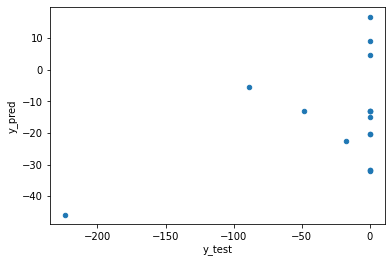

In [57]:
final.plot.scatter('y_test', 'y_pred')

_DecisionTreeRegressor_

In [58]:
best_tree = DecisionTreeRegressor(max_depth=6,
                                    max_features='sqrt',
                                    random_state=21).fit(X_train, y_train)

In [59]:
final = pd.DataFrame({"y_test": y_test, "y_pred": best_tree.predict(X_test)})
final

,y_test,y_pred
3,0.0,0.000000
19,-17.5,-2.000000
14,-48.5,-39.333333
45,-223.6,-47.222222
10,0.0,0.000000
54,0.0,0.000000
23,0.0,0.000000
29,0.0,0.000000
24,0.0,0.000000
13,-89.0,-39.333333


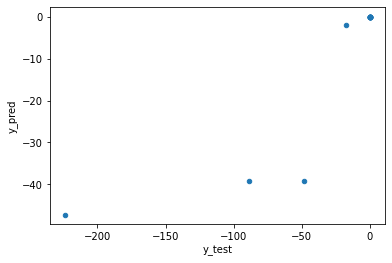

In [60]:
final.plot.scatter('y_test', 'y_pred')

_Random Forest_

In [61]:
best_forest = RandomForestRegressor(max_depth=20,
                                    max_features='log2',
                                    n_estimators=200,
                                    random_state=21).fit(X_train, y_train)

In [62]:
final = pd.DataFrame({"y_test": y_test, "y_pred": best_forest.predict(X_test)})
final

,y_test,y_pred
3,0.0,0.000000
19,-17.5,-27.372000
14,-48.5,-52.999000
45,-223.6,-63.522667
10,0.0,0.000000
54,0.0,0.000000
23,0.0,-0.882667
29,0.0,-2.121000
24,0.0,-0.882667
13,-89.0,-43.880417


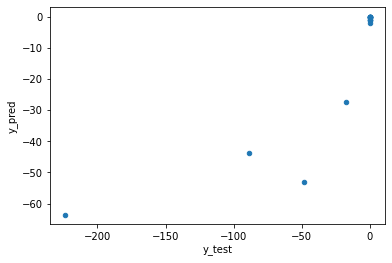

In [63]:
final.plot.scatter('y_test', 'y_pred')

3. Как выглядел бы график для идеального случая? Запишите ответ в markdown-ячейку в конце этой секции.

Прямая диагональная линия - график функции y = x (т.е. y_pred = y_test).